# Data Collection

To understand how the increasing availability of Airbnbs related to the housing market in New York City, we needed Airbnb data for NYC, housing prices, population data (to normalize data for given regions), and boundary files for the given regions. Airbnb data was downloaded in CSV format from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) while housing metrics such as price-to-rent ratios and median housing price were extracted as JSON files from [Quandl’s Zillow API](https://www.quandl.com/data/ZILLOW-Zillow-Real-Estate-Research) by running the zipcode_scraper.py code below in Terminal. 


In [ ]:
#Import libraries
from urllib.request import urlopen
import urllib.error
import json

#Zipcode Array
nyczips=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474, 10463, 10471, 10466, 10469, 10470, 10475, 10461, 10462,10464, 10465, 10472, 10473, 11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219, 11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231, 11203, 11210, 11225, 11226, 11207, 11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237, 10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035, 10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025, 10031, 10032, 10033, 10034, 10040, 11361, 11362, 11363, 11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367, 11412, 11423, 11432, 11433, 11434, 11435, 11436, 11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697, 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314]

#API URL format
zillowurl="https://www.quandl.com/api/v3/datasets/ZILLOW/Z%d_PRRAH/data.json?api_key=Rnsm2JCnHsx6zW7T3Z1K"


for zipcode in nyczips:
	#create urls
	zurl=zillowurl % zipcode
	try:
		response = urlopen(zurl)
		data = json.load(response)
		with open('PRRAH_%d.json' % zipcode, 'w') as outfile:
			json.dump(data, outfile)
			print('%d SUCCESS' % zipcode)

	except urllib.error.HTTPError as e:
		print(e)


# Data Wrangling



In [1]:
#Import libraries
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import glob
import matplotlib.pyplot as plt
import seaborn as sns

The Zillow data (price-to-rent ratios and median housing price) was mostly clean since zip codes attributed to NYC were specified in the zipcode_scraper.py code. The JSON files for price-to-rent ratio and median housing price were globbed together into two dataframes and dates were extracted from the filename strings such that the dataframes could later be joined if necessary.

In [2]:
#Load PRRAH json files from globbing
json_prrah=glob.glob('PRRAH/PRRAH_*.json')

#Initialize list to append DataFrames to
prrah_list=[]

#Create empty master dataframe
prr_df=pd.DataFrame(columns=['zip','date','pr_ratio','year','month'])

#For loop to go through filenames
for filename in json_prrah:
    data = pd.read_json(filename)
    df1=pd.DataFrame(data['dataset_data']['data'],columns=['date','pr_ratio'])
    prrah_list.append(data)
    #pull in filename and use split
    file_str = filename.replace('_',' ').replace('.',' ').split()
    df1['zip'] = file_str[1]
    #Create Year/Month columns
    df1['date_split'] = df1['date'].str.split('-')
    df1['year'] = df1['date_split'].str.get(0)
    df1['month'] = df1['date_split'].str.get(1)
    df1 = df1.drop('date_split',1)
    #concat DataFrames
    prr_df = pd.concat([prr_df,df1],axis=0,ignore_index=True)
    
#Create zip_date
prr_df['date_zip'] = prr_df['year'] + prr_df['month'] + '_' + prr_df['zip']

prr_df.to_csv('prr_df.csv')
prr_df.head()

/Users/christineseguritan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,date,month,pr_ratio,year,zip,date_zip
0,2017-05-31,05,26.39,2017,10001,201705_10001
1,2017-04-30,04,25.61,2017,10001,201704_10001
2,2017-03-31,03,25.56,2017,10001,201703_10001
3,2017-02-28,02,25.83,2017,10001,201702_10001
4,2017-01-31,01,25.55,2017,10001,201701_10001


In [3]:
#Load Median Listing Price json files from globbing
json_mlpah=glob.glob('MLPAH/MLPAH_*.json')

#Initialize list to append DataFrames to
mlpah_list=[]

#Create empty master dataframe
mlp_df=pd.DataFrame(columns=['zip','date','median_list_price'])

#For loop to go through filenames
for filename in json_mlpah:
    data = pd.read_json(filename)
    df1=pd.DataFrame(data['dataset_data']['data'],columns=['date','median_list_price'])
    mlpah_list.append(data)
    #pull in filename and use split
    file_str = filename.replace('_',' ').replace('.',' ').split()
    df1['zip'] = file_str[1]
    #Create Year/Month columns
    df1['date_split'] = df1['date'].str.split('-')
    df1['year'] = df1['date_split'].str.get(0)
    df1['month'] = df1['date_split'].str.get(1)
    df1 = df1.drop('date_split',1)
    #concat DataFrames
    mlp_df = pd.concat([mlp_df,df1],axis=0,ignore_index=True)

#Create zip_date
mlp_df['date_zip'] = mlp_df['year'] + mlp_df['month'] + '_' + prr_df['zip']

mlp_df.to_csv('mlp_df.csv')
mlp_df.head()

/Users/christineseguritan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,date,median_list_price,month,year,zip,date_zip
0,2018-01-31,3300000.0,01,2018,10001,201801_10001
1,2017-12-31,3110000.0,12,2017,10001,201712_10001
2,2017-11-30,2985000.0,11,2017,10001,201711_10001
3,2017-10-31,2990000.0,10,2017,10001,201710_10001
4,2017-09-30,3000000.0,09,2017,10001,201709_10001


In [4]:
#Load Airbnb Listing csv files from globbing
csv_listings=glob.glob('Airbnb_data/listings_*.csv')

#Create empty master dataframe
abnb_df=pd.DataFrame(columns=['id'])

The CSV files for Airbnb data was combined into a dataframe using a for loop that concatenated the numerous files and created the date feature from the filenames. A summary of the resulting dataframe showed that there were 1095681 rows of data. Of those rows, two of the columns were missing data: less than 1% of them had NaN values for the availability_30 column and less than 2% of them had NaN values for the zipcode column. As this was less than 10% of my data, it is acceptable to drop the NaN values. To further enforce that these Airbnb locations were in NYC, I took a subset of the resulting data frame in which the data’s zip code was listed within a list of NYC zip codes. These steps resulted in an overall ~4% data loss with 1062570 entries remaining.

In [3]:
#Empty Master DataFrame
airbnb_df=pd.DataFrame(columns=['id','date','zipcode','date_zip','availability_30'])


#Need to put in tidy data form
for filename in csv_listings:
    data = pd.read_csv(filename,low_memory=False,dtype={"id": int, "listing_url": str, "scrape_id": int,"name": str,"summary":str,"space":str,"description":str ,"experiences_offered":str,"neighborhood_overview":str,"notes":str,"has_availability":str,"reviews_per_month":float,})
    df1 = data[['id','availability_30','availability_60','availability_90','availability_365','zipcode','property_type','room_type','accommodates','price','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count']]
    file_str = filename.replace('_',' ').replace('.',' ').split()
    scrape_date = file_str[2]
    df1['date'] = scrape_date    
    #Create Year/Month columns
    df1['date'] = df1['date'].str.split('-')
    df1['year'] = df1['date'].str.get(0)
    df1['month'] = df1['date'].str.get(1)
    df1['date'] = df1['year'] + '-' + df1['month']
    df1['date_zip'] = df1['year'] + df1['month'] + '_' + df1['zipcode'] 
    #concat DataFrames on id# of listing
    airbnb_df = pd.concat([airbnb_df,df1],axis=0,ignore_index=True)

airbnb_df['date'] = pd.to_datetime(airbnb_df['date'], format='%Y-%m')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
airbnb_df['price'] = [x.strip('$') for x in airbnb_df['price']]
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'])
# airbnb_df.info()
# airbnb_df.describe()
#Info shows 1095681 entries; for availability_30 column less than 1% missing; for zipcode less than 2% missing
#Therefore, acceptable to drop NAN
airbnb_df = airbnb_df.dropna(axis=0,how='any')
airbnb_df.info()

# airbnb_clean.describe()

#Valid zipcodes
nyczips=['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462', '10464', '10465', '10472', '10473', '11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237', '10026', '10027', '10030', '10037', '10039', '10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040', '11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378', '10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
zip_clean = airbnb_df[airbnb_df['zipcode'].isin(nyczips)]


zip_clean.info()
#Resulted in 1062570 entries 

zip_clean


airbnb_group = zip_clean.groupby('date_zip')
type(airbnb_group)

airbnb_counts = {datezip:group.loc[group['availability_30']>0,'id'].count()
                     for datezip,group in airbnb_group}

airbnb_availcounts = pd.Series(airbnb_counts)

#data grouped by date_zip, room type
airbnb_bydzrt = zip_clean.groupby(['date_zip','room_type'])
airbnb_bydzrt_roomcount = airbnb_bydzrt['date'].value_counts()

# airbnb_bydzrt_roomcount
    
zip_clean.to_csv('zip_clean.csv')
airbnb_availcounts.to_csv('bydz_availcount.csv')
airbnb_bydzrt_roomcount.to_csv('bydzrt_roomcount.csv')

/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792963 entries, 0 to 1095678
Data columns (total 29 columns):
accommodates                      792963 non-null float64
availability_30                   792963 non-null object
availability_365                  792963 non-null float64
availability_60                   792963 non-null float64
availability_90                   792963 non-null float64
bathrooms                         792963 non-null float64
bedrooms                          792963 non-null float64
beds                              792963 non-null float64
calculated_host_listings_count    792963 non-null float64
date                              792963 non-null datetime64[ns]
date_zip                          792963 non-null object
guests_included                   792963 non-null float64
id                                792963 non-null object
maximum_nights                    792963 non-null float64
minimum_nights                    792963 non-null float64
month         

<IPython.core.display.Javascript object>


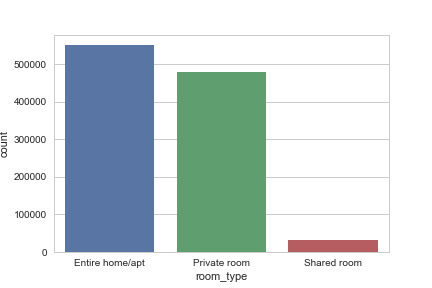

In [17]:
#Look at all NYC Airbnb's roomtypes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
%matplotlib notebook
sns.countplot(x="room_type", data=zip_clean)
plt.show()


<IPython.core.display.Javascript object>


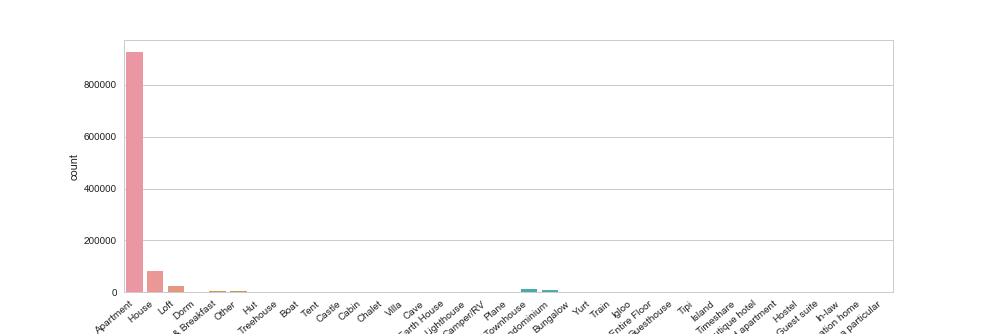

In [18]:
#Look at all NYC Airbnb's property types from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
g = sns.countplot(x="property_type", data=zip_clean)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()


<IPython.core.display.Javascript object>


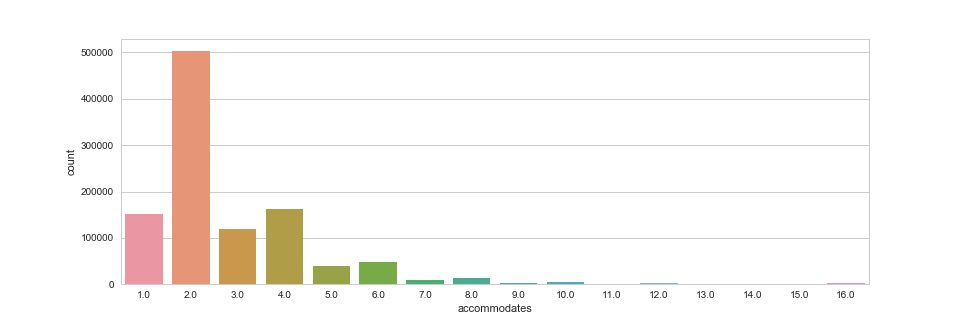

In [19]:
#Look at how many people all NYC Airbnb's from 2015-2017 period accommodate
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
sns.countplot(x='accommodates', data=zip_clean)
plt.show()


<IPython.core.display.Javascript object>


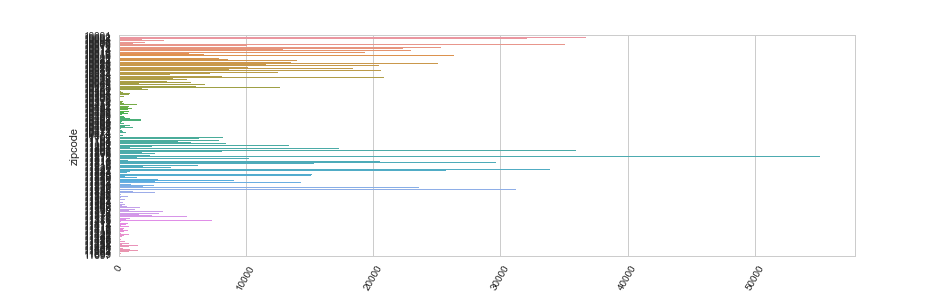

In [21]:
#Look at all NYC Airbnb's zipcodes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
sns.countplot(y="zipcode", data=zip_clean)
plt.xticks(rotation=60)

plt.show()
#Zipcode11211 seems to have the most Airbnbs available --> Williamsburg & East Williamsburg, Brooklyn
#Zipcode10002 also seems to have a considerable amount --> Lower East Side, Manhattan which is across the bridge from Williamsburg
#Zipcode10206 (another considerable datapoint) is just east of Williamsburg

<IPython.core.display.Javascript object>


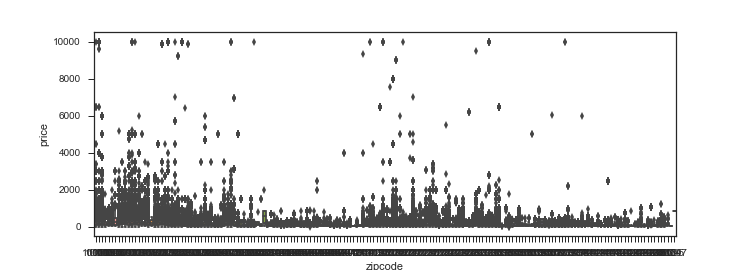

In [24]:
sns.set(style="ticks")
%matplotlib notebook
# Plot the Airbnb prices
sns.boxplot(x='zipcode', y="price", data=zip_clean)
plt.show()

# # Add in points to show each observation
# sns.swarmplot(x="price", y="zipcode", data=zip_clean,
#               size=2, color=".3", linewidth=0)



In [23]:
airbnb_agg = pd.DataFrame(airbnb_availcounts, columns=['active_count'])
airbnb_agg['date_zip']=airbnb_agg.index
airbnb_agg['datezip_split'] = airbnb_agg['date_zip'].str.split('_')
airbnb_agg['zip'] = airbnb_agg['datezip_split'].str.get(1)
airbnb_agg['date'] = airbnb_agg['datezip_split'].str.get(0)
airbnb_agg['year'] = airbnb_agg['date'].str[0:4]
airbnb_agg['month'] = airbnb_agg['date'].str[4:6]
airbnb_agg['date'] = airbnb_agg['year']+'-'+airbnb_agg['month']
airbnb_agg['date'] = pd.to_datetime(airbnb_agg['date'], format='%Y-%m')
airbnb_agg.drop(['datezip_split'],axis=1,inplace=True)


airbnb_agg = pd.merge(left = airbnb_agg, right = prr_df, how = 'left', left_index= True, right_on='date_zip')
airbnb_agg = pd.merge(left = airbnb_agg, right = mlp_df, how = 'left', left_on='date_zip', right_on='date_zip')
airbnb_agg['month'] = airbnb_agg['month_x']
airbnb_agg['year'] = airbnb_agg['year_x']
airbnb_agg['zip'] = airbnb_agg['zip_x']
airbnb_agg = airbnb_agg[['date_zip','active_count','pr_ratio','median_list_price','month','year','zip']]
airbnb_agg['date'] = airbnb_agg['year']+'-'+airbnb_agg['month']

airbnb_agg.to_csv('airzillow_df.csv')
airbnb_agg

,date_zip,active_count,pr_ratio,median_list_price,month,year,zip,date
0,201501_10001,297,24.23,NaN,01,2015,10001,2015-01
1,201501_10002,902,19.59,1290000.0,01,2015,10002,2015-01
2,201501_10003,718,24.52,NaN,01,2015,10003,2015-01
3,201501_10004,44,23.50,3550000.0,01,2015,10004,2015-01
4,201501_10005,111,23.86,1300000.0,01,2015,10005,2015-01
5,201501_10006,62,23.01,NaN,01,2015,10006,2015-01
6,201501_10007,31,28.11,870000.0,01,2015,10007,2015-01
7,201501_10009,817,NaN,NaN,01,2015,10009,2015-01
8,201501_10010,255,NaN,NaN,01,2015,10010,2015-01
9,201501_10011,667,24.14,1855000.0,01,2015,10011,2015-01


<IPython.core.display.Javascript object>


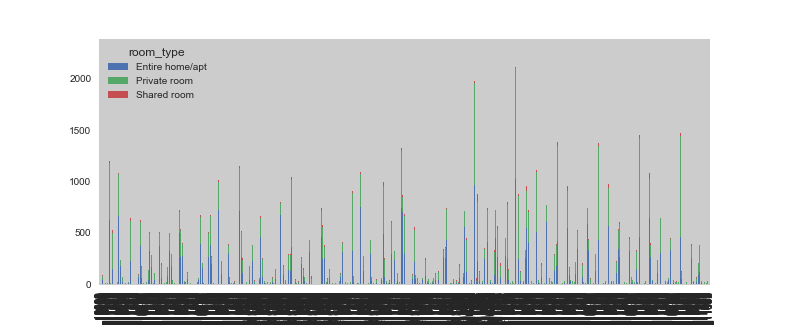

In [25]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
zip_clean.groupby(['date_zip','room_type']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.show()


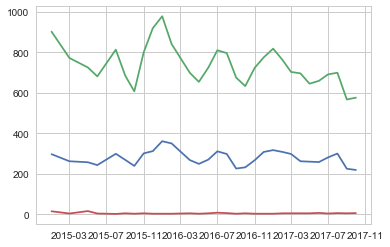

In [13]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

x10001 = airbnb_agg.loc[airbnb_agg['zip'] == '10001']['date']
y10001 = airbnb_agg.loc[airbnb_agg['zip'] == '10001']['active_count']
plt.plot(x10001, y10001)

x10002 = airbnb_agg.loc[airbnb_agg['zip'] == '10002']['date']
y10002 = airbnb_agg.loc[airbnb_agg['zip'] == '10002']['active_count']
plt.plot(x10002, y10002)

x11694 = airbnb_agg.loc[airbnb_agg['zip'] == '11694']['date']
y11694 = airbnb_agg.loc[airbnb_agg['zip'] == '11694']['active_count']
plt.plot(x11694,y11694)

plt.show()



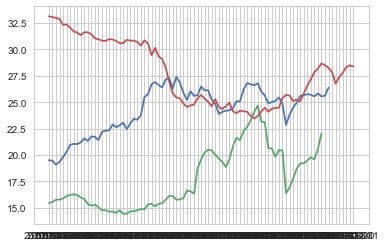

In [14]:
#Initial look at PRR data
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

prrx10001 = prr_df.loc[prr_df['zip'] == '10001']['date']
prry10001 = prr_df.loc[prr_df['zip'] == '10001']['pr_ratio']
plt.plot(prrx10001, prry10001)

prrx10002 = prr_df.loc[prr_df['zip'] == '10002']['date']
prry10002 = prr_df.loc[prr_df['zip'] == '10002']['pr_ratio']
plt.plot(prrx10002, prry10002)

prrx11694 = prr_df.loc[prr_df['zip'] == '11694']['date']
prry11694 = prr_df.loc[prr_df['zip'] == '11694']['pr_ratio']
plt.plot(prrx11694,prry11694)
plt.show()

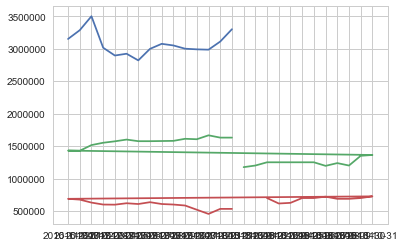

In [15]:
#Initial look at MLP data
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

mlpx10001 = mlp_df.loc[mlp_df['zip'] == '10001']['date']
mlpy10001 = mlp_df.loc[mlp_df['zip'] == '10001']['median_list_price']
plt.plot(mlpx10001, mlpy10001)

mlpx10002 = mlp_df.loc[mlp_df['zip'] == '10002']['date']
mlpy10002 = mlp_df.loc[mlp_df['zip'] == '10002']['median_list_price']
plt.plot(mlpx10002, mlpy10002)

mlpx11694 = mlp_df.loc[mlp_df['zip'] == '11694']['date']
mlpy11694 = mlp_df.loc[mlp_df['zip'] == '11694']['median_list_price']
plt.plot(mlpx11694,mlpy11694)
plt.show()